### Reading signals

For now only a try so it probably won't work --> BUT IT WORKS!!!

This notebook reads the signals send in output by the board

In [58]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq

import alsaaudio as aa

import time
import struct

In [59]:
# Format parameters
format = aa.PCM_FORMAT_S32_LE # Signed 16 bit integer in Little Endian format
pack_format = 'l' # short int (2 bytes) matching the format

channels = 2 # This is practically the only possibility as far as I managed to understand :|
rate = 192000 # Maximum rate supported by the board

In [60]:
inp = aa.PCM(aa.PCM_CAPTURE, aa.PCM_NORMAL, channels=channels, rate=rate, format=aa.PCM_FORMAT_S32_LE, periodsize=512, cardindex=2)
full_data = []
lung = []

loops = 3750*4
while loops > 0:
	loops -= 1
	# Read data from device
	l, data = inp.read()

	if l < 0:
		print("Capture buffer overrun! Continuing nonetheless ...")
	elif l:
		full_data.append(data)
		lung.append(l)
		time.sleep(.001)

In [61]:
print(len(full_data))
print(lung)

15000
[512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512

In [62]:
inp.info()

{'name': 'hw:2',
 'card_no': 2,
 'device_no': 0,
 'subdevice_no': 0,
 'state': 'XRUN',
 'access_type': 'RW_INTERLEAVED',
 ' (call value) type': 1,
 ' (call value) type_name': 'CAPTURE',
 ' (call value) mode': 0,
 ' (call value) mode_name': 'PCM_NORMAL',
 'format': 6,
 'format_name': 'S24_LE',
 'format_description': 'Signed 24 bit Little Endian',
 'subformat_name': 'STD',
 'subformat_description': 'Standard',
 'channels': 2,
 'rate': 192000,
 'period_time': 2666,
 'period_size': 512,
 'buffer_time': 10666,
 'buffer_size': 2048,
 'periods': 4,
 'rate_numden': (192000, 1),
 'significant_bits': 32,
 'is_batch': False,
 'is_block_transfer': False,
 'is_double': False,
 'is_half_duplex': False,
 'is_joint_duplex': False,
 'can_overrange': False,
 'can_mmap_sample_resolution': True,
 'can_pause': True,
 'can_resume': True,
 'can_sync_start': False}

In [63]:
full_data[5:50]

[b'}\xb0s\x00\x87\x8ct\x00(at\x00B>u\x00w\x0fu\x00^\xedu\x00\xb2\xb6u\x00m\x96v\x00\xcbSv\x00\xf71w\x00\xf6\xebv\x00\xd5\xd3w\x00\xbf\x85w\x00rcx\x00&\x0cx\x00\x15\xf3x\x00\r\x91x\x00>{y\x00\xe3\x18y\x00>\xfcy\x00z\x87y\x00\xdaxz\x00,\x03z\x00\x15\xe9z\x00\xeekz\x00\x10Z{\x00\xae\xd3z\x00\xf8\xbf{\x00\xdf0{\x00\xb9#|\x00>\x8c{\x00\xc4y|\x00\x8c\xde{\x00b\xcf|\x001(|\x00\x81\x19}\x00<n|\x00\x01e}\x00\x84\xab|\x00\\\x9c}\x00\xc5\xe4|\x00\xf5\xd9}\x00\xd1\x14}\x00\xb3\n~\x00ZB}\x00\xe29~\x00na}\x00\x1bV~\x00\xe4\x85}\x00\xb5|~\x006\x96}\x003\x8e~\x00\xd6\xa6}\x00\xe8\xa3~\x00i\xb6}\x00U\xa7~\x00\x11\xb0}\x00\xa4\xb1~\x00\x84\xb2}\x00f\xa7~\x004\xa7}\x00\xee\xa2~\x00\x8b\x92}\x00[\x8f~\x00\xd2|}\x00\xeat~\x00\xdf`}\x00K[~\x00Q2}\x00A2~\x00\x01\x13}\x00\x02\t~\x00\x12\xd5|\x00\xa6\xd3}\x00q\xa3|\x00\xba\x9e}\x00\x9ca|\x00\xd0Y}\x00\x96\x19|\x00\x01\x17}\x00:\xcd{\x00\xe4\xc6|\x00\x95|{\x00\x89t|\x00.\x1e{\x00b\x18|\x00t\xbbz\x00\xd2\xb8{\x00\xf4Yz\x00\x12O{\x00O\xecy\x00\xb8\xe4z\x00\xeary\

In [64]:
bytes_arr = bytearray()

for a in full_data:
    bytes_arr.extend(a)

bytes_list = bytes(bytes_arr)

In [65]:
print(bytes_list[0:100])

b"]\xefq\x00\xd3\xe3r\x00\x00,q\x00\x82\x1ar\x00l]p\x00cLq\x00%\x8ao\x00\x17sp\x00\xe7\xb3n\x00\x1b\x97o\x00\xe9\xd3m\x00m\xb9n\x00\x08\xf0l\x00>\xd7m\x00\xf6\x06l\x00c\xecl\x00\x8e\x16k\x00\x15\xf1k\x00r!j\x00(\x02k\x00\xa6'i\x00\xb5\nj\x00\xd3&h\x00f\x02i\x00\xb4\x1cg\x00"


In [66]:
listed = [bytes_list[i:i+4] for i in range(0,len(bytes_list), 4)]

In [67]:
print(listed[0:100])

[b']\xefq\x00', b'\xd3\xe3r\x00', b'\x00,q\x00', b'\x82\x1ar\x00', b'l]p\x00', b'cLq\x00', b'%\x8ao\x00', b'\x17sp\x00', b'\xe7\xb3n\x00', b'\x1b\x97o\x00', b'\xe9\xd3m\x00', b'm\xb9n\x00', b'\x08\xf0l\x00', b'>\xd7m\x00', b'\xf6\x06l\x00', b'c\xecl\x00', b'\x8e\x16k\x00', b'\x15\xf1k\x00', b'r!j\x00', b'(\x02k\x00', b"\xa6'i\x00", b'\xb5\nj\x00', b'\xd3&h\x00', b'f\x02i\x00', b'\xb4\x1cg\x00', b'\xeb\xf7g\x00', b'\x8f\x15f\x00', b'\t\xeff\x00', b'\x03\x03e\x00', b'"\xd8e\x00', b'\xc8\xecc\x00', b'\xc1\xb7d\x00', b')\xd1b\x00', b'\xff\x9fc\x00', b'\xa3\xb0a\x00', b'\xb8\x87b\x00', b'\x1a\x8b`\x00', b'\x99Ta\x00', b'\x94]_\x00', b'\x15$`\x00', b'\x9e0^\x00', b'\x93\x01_\x00', b'\x8d\xf6\\\x00', b'h\xbd]\x00', b'\x8e\xc1[\x00', b'*\x90\\\x00', b'\xc4~Z\x00', b'kG[\x00', b'\xd0>Y\x00', b'\xc1\x0cZ\x00', b'+\xf3W\x00', b'&\xafX\x00', b"'\xa9V\x00", b'\xd8nW\x00', b'\xd0SU\x00', b'\x9b\x1fV\x00', b'\x95\xffS\x00', b'm\xb7T\x00', b';\xa3R\x00', b'\x9dcS\x00', b'FDQ\x00', b'\xf3\xf0Q\x00', b'

In [92]:
data_array_0 = [int.from_bytes(b, byteorder='little', signed=True) for b in listed[::2]]
data_array_1 = [int.from_bytes(c, byteorder='little', signed=True) for c in listed[1::2]]

In [93]:
print(len(data_array_0))

7680000


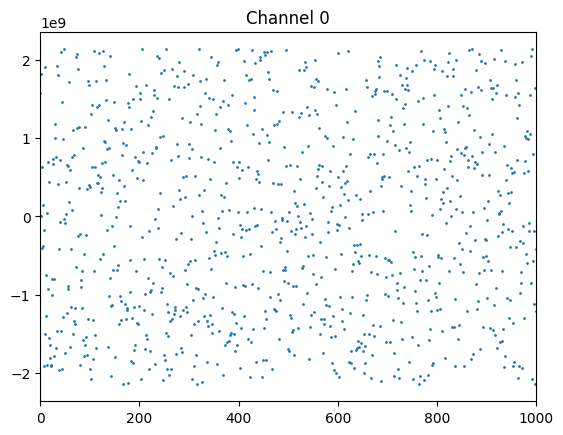

In [94]:
plt.plot(data_array_0, 'o', markersize = 1)
plt.title('Channel 0')
plt.xlim(0,1000);

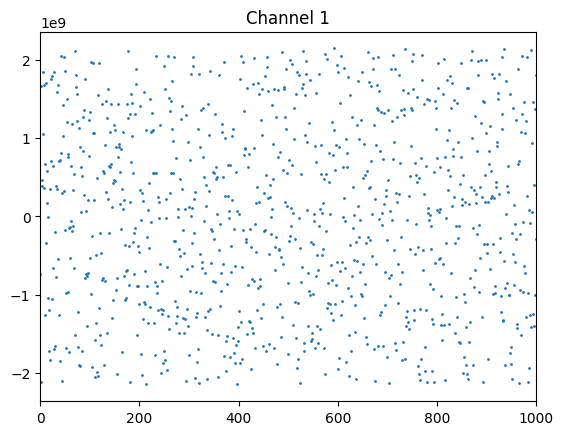

In [95]:
plt.plot(data_array_1, 'o', markersize = 1)
plt.title('Channel 1')
plt.xlim(0,1000);

In [96]:
yft = fft(data_array_0)
xft = fftfreq(int(len(data_array_0)), 1/rate)

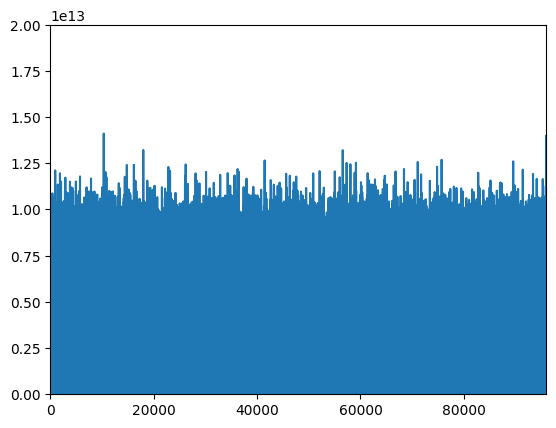

In [97]:
plt.plot(xft, np.abs(yft))#, 'o', markersize = 1)
plt.xlim(0,rate/2);
plt.ylim(0,2e13);

In [98]:
max_freq = xft[np.argmax(np.abs(yft))]
print(max_freq)

10310.6


In [99]:
'''a = np.max(np.abs(yft))
b = np.abs(yft[5622373])
c = (2**32)/2

print(a)
print(b)
print(a-b)
print(c)'''

'a = np.max(np.abs(yft))\nb = np.abs(yft[5622373])\nc = (2**32)/2\n\nprint(a)\nprint(b)\nprint(a-b)\nprint(c)'

In [100]:
yft = fft(data_array_1)
xft = fftfreq(int(len(data_array_1)), 1/rate)

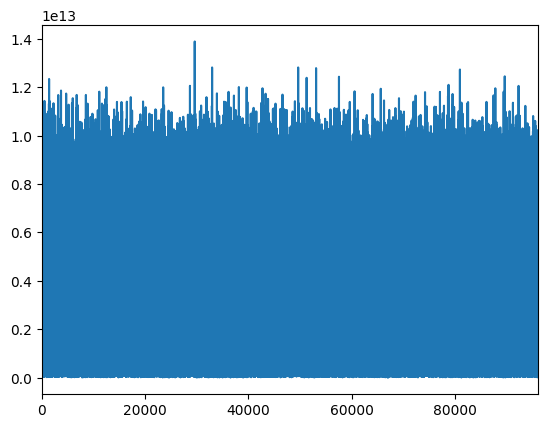

In [101]:
plt.plot(xft, np.abs(yft))#, 'o', markersize = 1)
plt.xlim(0,rate/2);

In [102]:
max_freq = xft[np.argmax(np.abs(yft))]
print(max_freq)

29613.775


In [103]:
inp.close()